In [31]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#Create filepath
countypath = "Resources/NewListAll2014-UPDATE01.csv"

#Read in csv
countydata = pd.read_csv(countypath)

#Remove column 1&2
del countydata['Unnamed: 0']
del countydata['Unnamed: 0.1']
countydata.head()

,FIPS,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,...,HPSA Shortage,County,State_y,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count
0,1001,AL,Autauga County,"54,876","54,366",5.8,1.45,0.90,2.11,7.32,...,6.96,Autauga County,AL,1001.0,17.0,NaN,NaN,17.0,55395.0,1
1,1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,13.30,...,1.03,Baldwin County,AL,1003.0,97.0,18.0,40.0,155.0,200111.0,11
2,1005,AL,Barbour County,"26,758","34,971",10.5,2.72,1.89,3.57,5.40,...,0.93,Barbour County,AL,1005.0,11.0,NaN,NaN,11.0,26887.0,1
3,1007,AL,Bibb County,"22,541","39,546",7.2,1.22,0.70,1.92,13.03,...,0.00,Bibb County,AL,1007.0,10.0,NaN,NaN,10.0,22506.0,1
4,1009,AL,Blount County,"57,521","45,567",6.1,1.31,0.77,2.03,14.38,...,16.66,Blount County,AL,1009.0,24.0,NaN,12.0,36.0,57719.0,2


In [33]:
#countydata.info()

#Remove comma from Population and Median Income
countydata['POP_ESTIMATE_2014'] = countydata['POP_ESTIMATE_2014'].str.replace(',', '')
countydata['HH_income_2014'] = countydata['HH_income_2014'].str.replace(',', '')

#Convert Population, Median Income to float
countydata['POP_ESTIMATE_2014'] = countydata['POP_ESTIMATE_2014'].astype(float)
countydata['HH_income_2014'] = countydata['HH_income_2014'].astype(float)

countydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 37 columns):
FIPS                                2254 non-null int64
State_x                             2254 non-null object
Area_Name                           2254 non-null object
POP_ESTIMATE_2014                   2254 non-null float64
HH_income_2014                      2245 non-null float64
Unemployment_rate_2014              2254 non-null float64
Alcohol Mortality Rate              2254 non-null float64
Alcohol Mortality Rate(F)           2254 non-null float64
Alcohol Mortality Rate(M)           2254 non-null float64
Drug Mortality Rate                 2254 non-null float64
Drug Mortality Rate(F)              2254 non-null float64
Drug Mortality Rate(M)              2254 non-null float64
Self-harm Mortality Rate            2254 non-null float64
Self-harm Mortality Rate(F)         2254 non-null float64
Self-harm Mortality Rate(M)         2254 non-null float64
Int. Violence Mortality Rat

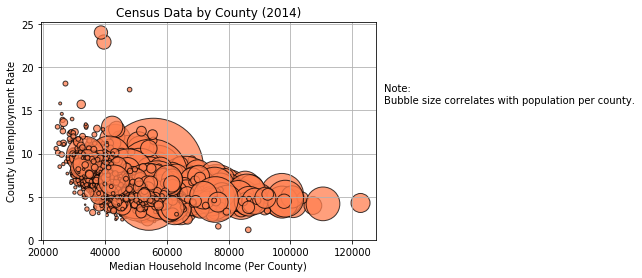

In [34]:
#Plot Unemployment, Median Income and Population per county (bubble)
#Dataframe subset
county_census = countydata[['HH_income_2014','Unemployment_rate_2014','POP_ESTIMATE_2014']]
county_census = county_census.dropna()

#Define x, y and s variables
med_income1 = county_census['HH_income_2014']
unemploy_rate1 = county_census['Unemployment_rate_2014']
population1 = county_census['POP_ESTIMATE_2014']

#Plot bubble
bubble1 = plt.scatter(med_income1[:], unemploy_rate1[:], s=(population1[:]/1000), marker='o', facecolor='coral', edgecolor='black', linewidth=1, alpha=.75)

# Incorporate the other graph properties
#title
plt.title("Census Data by County (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel('County Unemployment Rate')

#Add grid
plt.grid()

# Incorporate a text label regarding circle size
plt.figtext(.92, .6, s='''Note: 
Bubble size correlates with population per county.''')


# Save Figure
plt.savefig("Images/bubble1.png")


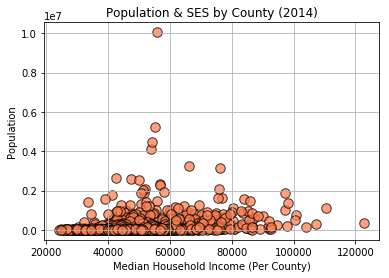

In [42]:
#Plot Median Income and Population per county (scatter)

#Plot scatter
scatter1b = plt.scatter(med_income1[:], population1[:], s=90, marker='o', facecolor='coral', edgecolor='black', linewidth=1, alpha=.75)

# Incorporate the other graph properties
#title
plt.title("Population & SES by County (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel('Population')

#Add grid
plt.grid()


# Save Figure
plt.savefig("Images/scatter1b.png")


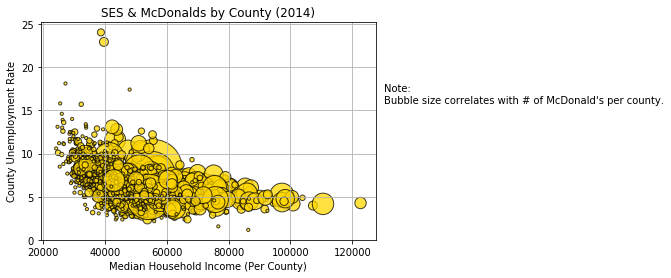

In [37]:
#Plot McDs Count, Median Income and Population per county (bubble)
#Define x, y and s variables
unemploy_rate5 = ses_mcd['Unemployment_rate_2014']

#Plot bubble
bubble5 = plt.scatter(med_income2b[:], unemploy_rate5[:], s=(mcdcount2b[:]*10), marker='o', facecolor='gold', edgecolor='black', linewidth=1, alpha=.75)

#add trendline
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")


# Incorporate the other graph properties
#title
plt.title("SES & McDonalds by County (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel('County Unemployment Rate')

#Add grid
plt.grid()

# Incorporate a text label regarding circle size
plt.figtext(.92, .6, s='''Note: 
Bubble size correlates with # of McDonald's per county.''')


# Save Figure
plt.savefig("Images/bubble5.png")


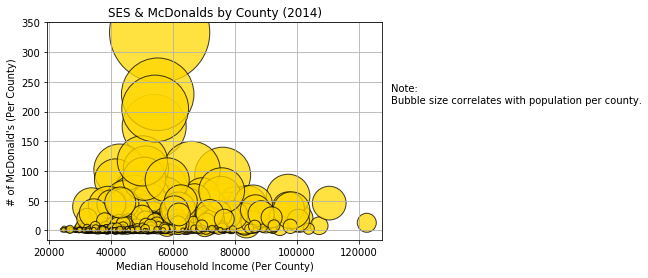

In [38]:
#Plot McDs Count, Median Income and Population per county (bubble)
#dataframe subset
county_mcd = countydata[['HH_income_2014','POP_ESTIMATE_2014','McDonalds Count']]
county_mcd = county_mcd.dropna()

#Define x, y and s variables
med_income5b = county_mcd['HH_income_2014']
population5b = county_mcd['POP_ESTIMATE_2014']
mcdcount5b = county_mcd['McDonalds Count']

#Plot bubble
bubble5 = plt.scatter(med_income5b[:], mcdcount5b[:], s=(population5b[:]/1000), marker='o', facecolor='gold', edgecolor='black', linewidth=1, alpha=.75)

# Incorporate the other graph properties
#title
plt.title("SES & McDonalds by County (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel("# of McDonald's (Per County)")

#Add grid
plt.grid()

# Incorporate a text label regarding circle size
plt.figtext(.92, .6, s='''Note: 
Bubble size correlates with population per county.''')


# Save Figure
plt.savefig("Images/bubble5b.png")


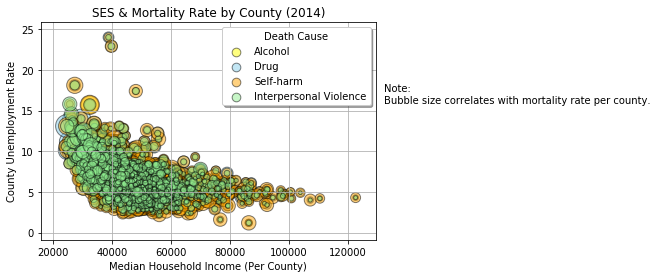

In [39]:
#Plot Mortality Rates, Median Income and Population per county (bubble)
#Dataframe subset
county_mort = countydata[['HH_income_2014','Unemployment_rate_2014','Alcohol Mortality Rate','Drug Mortality Rate', 'Self-harm Mortality Rate', 'Int. Violence Mortality Rate']]
county_mort = county_mort.dropna()

#Define x, y and s variables
med_income6 = county_mort['HH_income_2014']
unemploy_rate6 = county_mort['Unemployment_rate_2014']
mort_alc6 = county_mort['Alcohol Mortality Rate']
mort_drug6 = county_mort['Drug Mortality Rate']
mort_sh6 = county_mort['Self-harm Mortality Rate']
mort_iv6 = county_mort['Int. Violence Mortality Rate']

#Plot bubble
bubble6alc = plt.scatter(med_income6[:], unemploy_rate6[:], s=(mort_alc6[:]*10), marker='o', facecolor='yellow', edgecolor='black', linewidth=1, alpha=.5)
bubble6drug = plt.scatter(med_income6[:], unemploy_rate6[:], s=(mort_drug6[:]*10), marker='o', facecolor='skyblue', edgecolor='black', linewidth=1, alpha=.5)
bubble6sh = plt.scatter(med_income6[:], unemploy_rate6[:], s=(mort_sh6[:]*10), marker='o', facecolor='orange', edgecolor='black', linewidth=1, alpha=.5)
bubble6iv = plt.scatter(med_income6[:], unemploy_rate6[:], s=(mort_iv6[:]*10), marker='o', facecolor='lightgreen', edgecolor='black', linewidth=1, alpha=.5)

# Incorporate the other graph properties
#title
plt.title("SES & Mortality Rate by County (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel('County Unemployment Rate')

#Add grid
plt.grid()

#Add legend
lgnd6 = plt.legend(handles=[bubble6alc, bubble6drug, bubble6sh, bubble6iv], 
           labels=["Alcohol", 'Drug', 'Self-harm', 'Interpersonal Violence'], title='Death Cause', shadow=True)
for handle in lgnd6.legendHandles:
    handle.set_sizes([75.0])
    
# Incorporate a text label regarding circle size
plt.figtext(.92, .6, s='''Note: 
Bubble size correlates with mortality rate per county.''')


# Save Figure
plt.savefig("Images/bubble6.png")


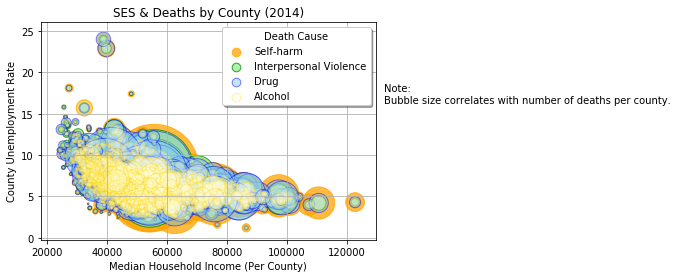

In [40]:
#Plot Death Count, Median Income and Population per county (bubble)
#Dataframe subset
pop_county_mort = countydata[['POP_ESTIMATE_2014','HH_income_2014','Unemployment_rate_2014','Alcohol Mortality Rate','Drug Mortality Rate', 'Self-harm Mortality Rate', 'Int. Violence Mortality Rate']]
pop_county_mort = pop_county_mort.dropna()

#Define x, y and s variables
med_income6b = pop_county_mort['HH_income_2014']
unemploy_rate6b = pop_county_mort['Unemployment_rate_2014']
death_alc6 = (pop_county_mort['Alcohol Mortality Rate']*pop_county_mort['POP_ESTIMATE_2014'])/100
death_drug6 = (pop_county_mort['Drug Mortality Rate']*pop_county_mort['POP_ESTIMATE_2014'])/100
death_sh6 = (pop_county_mort['Self-harm Mortality Rate']*pop_county_mort['POP_ESTIMATE_2014'])/100
death_iv6 = (pop_county_mort['Int. Violence Mortality Rate']*pop_county_mort['POP_ESTIMATE_2014'])/100

#Plot bubble
bubble6bsh = plt.scatter(med_income6b[:], unemploy_rate6b[:], s=(death_sh6[:]/100), marker='o', facecolor='orange', edgecolor='orange', linewidth=1, alpha=.75)
bubble6biv = plt.scatter(med_income6b[:], unemploy_rate6b[:], s=(death_iv6[:]/100), marker='o', facecolor='lightgreen', edgecolor='green', linewidth=1, alpha=.75)
bubble6bdrug = plt.scatter(med_income6b[:], unemploy_rate6b[:], s=(death_drug6[:]/100), marker='o', facecolor='skyblue', edgecolor='blue', linewidth=1, alpha=.5)
bubble6balc = plt.scatter(med_income6b[:], unemploy_rate6b[:], s=(death_alc6[:]/100), marker='o', facecolor='lightyellow', edgecolor='gold', linewidth=1, alpha=.35)

# Incorporate the other graph properties
#title
plt.title("SES & Deaths by County (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel('County Unemployment Rate')

#Add grid
plt.grid()

#Add legend
lgnd6b = plt.legend(handles=[bubble6bsh, bubble6biv, bubble6bdrug, bubble6balc], 
           labels=['Self-harm', 'Interpersonal Violence', 'Drug', "Alcohol"], title='Death Cause', shadow=True)
for handle in lgnd6b.legendHandles:
    handle.set_sizes([75.0])

# Incorporate a text label regarding circle size
plt.figtext(.92, .6, s='''Note: 
Bubble size correlates with number of deaths per county.''')


# Save Figure
plt.savefig("Images/bubble6b.png")


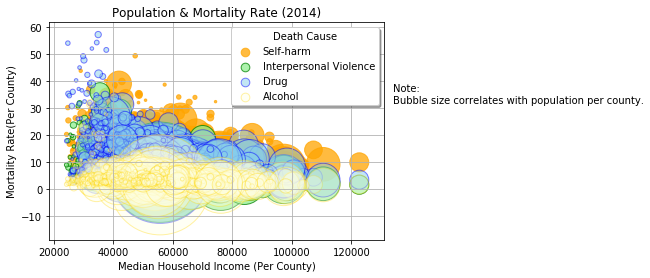

In [48]:
#Plot Death Count, Median Income and Population per county (bubble)
#dataframe subset
county_mort6c = countydata[['POP_ESTIMATE_2014','HH_income_2014','Alcohol Mortality Rate','Drug Mortality Rate', 'Self-harm Mortality Rate', 'Int. Violence Mortality Rate']]
county_mort6c = county_mort6c.dropna()

#Define x, y and s variables
med_income6c = county_mort6c['HH_income_2014']
population6c = county_mort6c['POP_ESTIMATE_2014']
mort_alc6c = county_mort6c['Alcohol Mortality Rate']
mort_drug6c = county_mort6c['Drug Mortality Rate']
mort_sh6c = county_mort6c['Self-harm Mortality Rate']
mort_iv6c = county_mort6c['Int. Violence Mortality Rate']

#Plot bubbles
bubble6csh = plt.scatter(med_income6c[:], mort_sh6c[:], s=(population6c/1000), marker='o', facecolor='orange', edgecolor='orange', linewidth=1, alpha=.75)
bubble6civ = plt.scatter(med_income6c[:], mort_iv6c[:], s=(population6c/1000), marker='o', facecolor='lightgreen', edgecolor='green', linewidth=1, alpha=.75)
bubble6cdrug = plt.scatter(med_income6c[:], mort_drug6c[:], (population6c/1000), marker='o', facecolor='skyblue', edgecolor='blue', linewidth=1, alpha=.5)
bubble6calc = plt.scatter(med_income6c[:], mort_alc6c[:], (population6c/1000), marker='o', facecolor='lightyellow', edgecolor='gold', linewidth=1, alpha=.35)

# Incorporate the other graph properties
#title
plt.title("Population & Mortality Rate (2014)")

#xlabel
plt.xlabel('Median Household Income (Per County)')

#ylabel
plt.ylabel('Mortality Rate(Per County)')

#Add grid
plt.grid()

#Add legend
lgnd6c = plt.legend(handles=[bubble6csh, bubble6civ, bubble6cdrug, bubble6calc], 
           labels=['Self-harm', 'Interpersonal Violence', 'Drug', "Alcohol"], title='Death Cause', shadow=True)
for handle in lgnd6c.legendHandles:
    handle.set_sizes([75.0])
    
# Incorporate a text label regarding circle size
plt.figtext(.92, .6, s='''Note: 
Bubble size correlates with population per county.''')


# Save Figure
plt.savefig("Images/bubble6c.png")
